In [1]:
import requests
url="http://182.18.164.20/transformer_api/current_voltage/867322031102411"
user="admin"
passwd="admin@123"
auth_values=(user,passwd)
response=requests.get(url,auth=auth_values)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [4]:
import pandas as pd
df=pd.DataFrame.from_dict(response.json(),orient='columns')
df.head(5)

,A_id,DeviceImei,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,AVL,INUT
0,920335,867322031102411,2021-06-06T00:15:04,234.3,229.9,233.5,150.9,100.9,105.1,403.3,399.8,405.8,0.0,47.7
1,920288,867322031102411,2021-06-06T00:00:04,233.9,229.2,233.1,159.7,110.9,105.4,402.5,399.1,405.3,0.0,52.4
2,920244,867322031102411,2021-06-05T23:45:05,233.7,228.7,232.8,160.9,129.7,99.3,401.7,398.4,404.5,0.0,57.1
3,920199,867322031102411,2021-06-05T23:30:04,233.8,229.9,233.1,184.2,96.3,119.8,403.4,399.3,404.7,0.0,80.5
4,920154,867322031102411,2021-06-05T23:15:04,233.0,228.5,232.1,160.8,102.4,104.3,401.3,397.3,403.3,0.0,58.7


In [5]:
df.corr()

,A_id,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,AVL,INUT
A_id,1.000000,-0.451298,-0.450056,-0.168155,0.021765,0.368190,-0.084593,-0.392963,-0.312328,-0.325076,NaN,-0.339659
VL1,-0.451298,1.000000,0.989541,0.797195,-0.630293,-0.755122,-0.584963,0.969369,0.906325,0.925247,NaN,-0.250734
VL2,-0.450056,0.989541,1.000000,0.826382,-0.633892,-0.773229,-0.596945,0.955934,0.935422,0.939412,NaN,-0.245581
VL3,-0.168155,0.797195,0.826382,1.000000,-0.746462,-0.756912,-0.733383,0.698603,0.957972,0.956663,NaN,-0.429882
IL1,0.021765,-0.630293,-0.633892,-0.746462,1.000000,0.813985,0.909092,-0.536820,-0.732779,-0.743973,NaN,0.747566
IL2,0.368190,-0.755122,-0.773229,-0.756912,0.813985,1.000000,0.774952,-0.662145,-0.799493,-0.811669,NaN,0.303816
IL3,-0.084593,-0.584963,-0.596945,-0.733383,0.909092,0.774952,1.000000,-0.506437,-0.710675,-0.707045,NaN,0.676176
VL12,-0.392963,0.969369,0.955934,0.698603,-0.536820,-0.662145,-0.506437,1.000000,0.819612,0.839606,NaN,-0.199951
VL23,-0.312328,0.906325,0.935422,0.957972,-0.732779,-0.799493,-0.710675,0.819612,1.000000,0.989026,NaN,-0.369521
VL31,-0.325076,0.925247,0.939412,0.956663,-0.743973,-0.811669,-0.707045,0.839606,0.989026,1.000000,NaN,-0.374071


In [15]:
X=df['INUT'].values
result=adfuller(X)
print('ADF statistic : f', result[0])
print('P value : ', result[1])
print('critical values :')
for key,value in result[4].items():
  print('\t%s: %.3f' %(key,value))
if result[0]<result[4]["5%"]:
  print("It is stationery.")
else:
  print("It is not stationery")


ADF statistic : f -9.313356140369647
P value :  1.0347384753906199e-15
critical values :
	1%: -3.431
	5%: -2.862
	10%: -2.567
It is stationery.


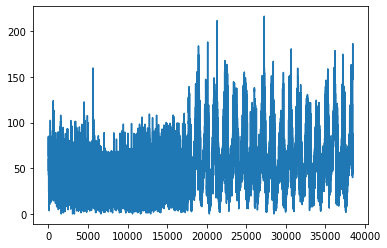

In [16]:
plt.plot(df['INUT'])